Weights learned by the perceptron:  [-3.24561414  3.76384492  3.3263646 ]
norm of w = 5.980404766868125
all 6 distances:  [-0.6217555479695632, 0.7057071565740187, -0.6147730166732543, -0.41169400847946735, -0.4053022626218665, -0.3490371950129907, -0.5367533812901856, -0.758616260678408, 0.8339112683501012, -0.38587656292292083, -0.4248215867963208, 0.8029216112983092, -0.18932679022677046, 0.3139559749466453, -0.7643680655302001, 0.6682084780685769, 0.7368343229484263, 0.35492470819408845, 0.9587918184862112, -0.7101799470652164, 0.7150308310027127, -0.4021293704788006, -0.520709674197113, -0.5928861539100673, -0.6389865053554622, -0.36774417309750845, -0.3432066008488629, 0.39207856203575775, 0.7163578052953498, 0.7324007170237412, -0.8952448045498084, -0.469624990178219, 0.6144812904277013, 0.843628537993379, -0.3972379679671918, 0.5161103064355821, 0.5650405612993461, 0.4336913042566729, 0.4541832226888058, -0.9835658372552325, -0.5553771608999838, -0.6746931551545108, 1.080017150

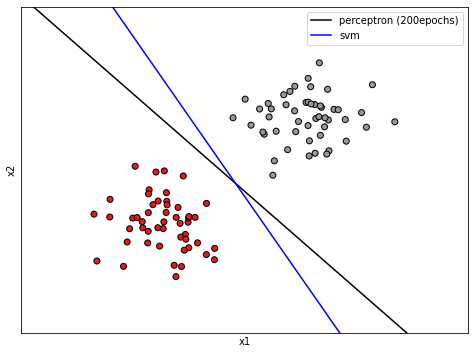

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

def calculate_margin(w) :
    dists=[]
    normw = np.dot(w,w) ** 0.5
    print('norm of w =', normw)
    for t in range(n_samples) :
        x=train_x[t,:]    
        distance = np.dot(x,w) / normw
        dists.append(distance)

    positive_dists = np.array(dists)
    positive_dists[positive_dists<0] = np.inf
    negative_dists = np.array(dists)
    negative_dists[negative_dists>0] = -np.inf
    print('all 6 distances: ', dists)
    positive_closest = np.min(positive_dists)
    negative_closest = np.max(negative_dists)
    print('the closests on each side: ',positive_closest, negative_closest)
    print('margin = ', 2*np.min((positive_closest,np.abs(negative_closest))))
    print('imbalance between the distances of the two sides is not good/optimal')
    return

n_samples=100
mean1 = [0, 0]
mean2 = [1, 1]
cluster_std=0.2
from sklearn.datasets import make_blobs
data, target = make_blobs(n_samples=n_samples, n_features=2, 
                              centers=[mean1, mean2], cluster_std=cluster_std)
d = data.shape[1]
train_x = np.insert(data, 0, 1, axis=1);
train_y = np.array(target)

eta=0.5
N_epoch = 200
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
rng = np.random.RandomState(1)
w = rng.randn(d+1)/100
for epoch in range(N_epoch):
    numcorr=0
    dw=np.zeros(w.shape)
    for t in range(n_samples):
        r=train_y[t]
        x=train_x[t,:]
        y=sigmoid(np.dot(w,x))
        if (y>0.5 and r==1) or (y<=0.5 and r==0) :
            numcorr=numcorr+1     #this calculates the training accuracy
        delta=r-y
        dw=dw+x.T*delta
    w=w+eta*dw/n_samples
print('Weights learned by the perceptron: ', w)  
calculate_margin(w)
print()

clf = LinearSVC(random_state=0, tol = 0.0000001, C=1000)
clf.fit(train_x[:,1:], train_y)
svm_w = np.append(clf.intercept_,clf.coef_)
print('Weights learned by the SVM: ', svm_w)
calculate_margin(svm_w)

x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
8
# Plot the training points
plt.scatter(data[:, 0], data[:, 1], c=train_y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

xx = np.linspace(-5, 5)
yy_perceptron = (-w[0]-xx*w[1])/w[2]
plt.plot(xx, yy_perceptron, 'k-')

yy_svm=  (-svm_w[0]-xx*svm_w[1])/svm_w[2]
plt.plot(xx, yy_svm, 'b-')

plt.legend(['perceptron ('+str(N_epoch)+'epochs)', 'svm'])
